In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.utils import shuffle
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
import torch
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.feature_selection import RFECV
import xgboost as xgb
import lightgbm as lgbm
from xgboost import XGBClassifier as XGB
from lightgbm import LGBMClassifier as LGBC
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score,cross_validate
from ray import tune
from concurrent.futures import ThreadPoolExecutor
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torch
from torch.nn import functional as F
import torch.optim as optim
from tqdm.auto import tqdm
import pickle
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

import importlib
import all_merics
importlib.reload(all_merics)
from all_merics import *
import mlp_model
importlib.reload(mlp_model)
from mlp_model import *

In [15]:
df_exo = pd.read_csv('exo_gapen_descri_sxnx.csv', index_col=0)
df_tox = pd.read_csv('tox_gapen_descri_sxnx.csv', index_col=0)
df_all = pd.concat([df_exo, df_tox], axis=0)
df_all_random = shuffle(df_all,  random_state=1)

col_list = list(df_all_random.columns.values)
gapen_all = ['sx_ave1', 'sx_ave2', 'sx_ave3', 'sx_ave4', 'sx_ave5', 'sx_ave6', 'sx_ave7', 'sx_ave8', 'sx_ave9', 'sx_ave10', 'sx_std1', 'sx_std2', 'sx_std3', 'sx_std4', 'sx_std5', 'sx_std6', 'sx_std7', 'sx_std8', 'sx_std9', 'sx_std10', 'nx_ave1', 'nx_ave2', 'nx_ave3', 'nx_ave4', 'nx_ave5', 'nx_ave6', 'nx_ave7', 'nx_ave8', 'nx_ave9', 'nx_ave10', 'nx_std1', 'nx_std2', 'nx_std3', 'nx_std4', 'nx_std5', 'nx_std6', 'nx_std7', 'nx_std8', 'nx_std9', 'nx_std10', 'oldnbe', 'oldstd', 'newnbe', 'newstd', 'max_gap', 'sx_ave1*sx_ave2', 'sx_ave1*sx_ave3', 'sx_ave1*sx_ave4', 'sx_ave1*sx_ave5', 'sx_ave1*sx_ave6', 'sx_ave1*sx_ave7', 'sx_ave1*sx_ave8', 'sx_ave1*sx_ave9', 'sx_ave1*sx_ave10', 'sx_ave2*sx_ave3', 'sx_ave2*sx_ave4', 'sx_ave2*sx_ave5', 'sx_ave2*sx_ave6', 'sx_ave2*sx_ave7', 'sx_ave2*sx_ave8', 'sx_ave2*sx_ave9', 'sx_ave2*sx_ave10', 'sx_ave3*sx_ave4', 'sx_ave3*sx_ave5', 'sx_ave3*sx_ave6', 'sx_ave3*sx_ave7', 'sx_ave3*sx_ave8', 'sx_ave3*sx_ave9', 'sx_ave3*sx_ave10', 'sx_ave4*sx_ave5', 'sx_ave4*sx_ave6', 'sx_ave4*sx_ave7', 'sx_ave4*sx_ave8', 'sx_ave4*sx_ave9', 'sx_ave4*sx_ave10', 'sx_ave5*sx_ave6', 'sx_ave5*sx_ave7', 'sx_ave5*sx_ave8', 'sx_ave5*sx_ave9', 'sx_ave5*sx_ave10', 'sx_ave6*sx_ave7', 'sx_ave6*sx_ave8', 'sx_ave6*sx_ave9', 'sx_ave6*sx_ave10', 'sx_ave7*sx_ave8', 'sx_ave7*sx_ave9', 'sx_ave7*sx_ave10', 'sx_ave8*sx_ave9', 'sx_ave8*sx_ave10', 'sx_ave9*sx_ave10', 'sx_std1*sx_std2', 'sx_std1*sx_std3', 'sx_std1*sx_std4', 'sx_std1*sx_std5', 'sx_std1*sx_std6', 'sx_std1*sx_std7', 'sx_std1*sx_std8', 'sx_std1*sx_std9', 'sx_std1*sx_std10', 'sx_std2*sx_std3', 'sx_std2*sx_std4', 'sx_std2*sx_std5', 'sx_std2*sx_std6', 'sx_std2*sx_std7', 'sx_std2*sx_std8', 'sx_std2*sx_std9', 'sx_std2*sx_std10', 'sx_std3*sx_std4', 'sx_std3*sx_std5', 'sx_std3*sx_std6', 'sx_std3*sx_std7', 'sx_std3*sx_std8', 'sx_std3*sx_std9', 'sx_std3*sx_std10', 'sx_std4*sx_std5', 'sx_std4*sx_std6', 'sx_std4*sx_std7', 'sx_std4*sx_std8', 'sx_std4*sx_std9', 'sx_std4*sx_std10', 'sx_std5*sx_std6', 'sx_std5*sx_std7', 'sx_std5*sx_std8', 'sx_std5*sx_std9', 'sx_std5*sx_std10', 'sx_std6*sx_std7', 'sx_std6*sx_std8', 'sx_std6*sx_std9', 'sx_std6*sx_std10', 'sx_std7*sx_std8', 'sx_std7*sx_std9', 'sx_std7*sx_std10', 'sx_std8*sx_std9', 'sx_std8*sx_std10', 'sx_std9*sx_std10', 'nx_ave1*nx_ave2', 'nx_ave1*nx_ave3', 'nx_ave1*nx_ave4', 'nx_ave1*nx_ave5', 'nx_ave1*nx_ave6', 'nx_ave1*nx_ave7', 'nx_ave1*nx_ave8', 'nx_ave1*nx_ave9', 'nx_ave1*nx_ave10', 'nx_ave2*nx_ave3', 'nx_ave2*nx_ave4', 'nx_ave2*nx_ave5', 'nx_ave2*nx_ave6', 'nx_ave2*nx_ave7', 'nx_ave2*nx_ave8', 'nx_ave2*nx_ave9', 'nx_ave2*nx_ave10', 'nx_ave3*nx_ave4', 'nx_ave3*nx_ave5', 'nx_ave3*nx_ave6', 'nx_ave3*nx_ave7', 'nx_ave3*nx_ave8', 'nx_ave3*nx_ave9', 'nx_ave3*nx_ave10', 'nx_ave4*nx_ave5', 'nx_ave4*nx_ave6', 'nx_ave4*nx_ave7', 'nx_ave4*nx_ave8', 'nx_ave4*nx_ave9', 'nx_ave4*nx_ave10', 'nx_ave5*nx_ave6', 'nx_ave5*nx_ave7', 'nx_ave5*nx_ave8', 'nx_ave5*nx_ave9', 'nx_ave5*nx_ave10', 'nx_ave6*nx_ave7', 'nx_ave6*nx_ave8', 'nx_ave6*nx_ave9', 'nx_ave6*nx_ave10', 'nx_ave7*nx_ave8', 'nx_ave7*nx_ave9', 'nx_ave7*nx_ave10', 'nx_ave8*nx_ave9', 'nx_ave8*nx_ave10', 'nx_ave9*nx_ave10', 'nx_std1*nx_std2', 'nx_std1*nx_std3', 'nx_std1*nx_std4', 'nx_std1*nx_std5', 'nx_std1*nx_std6', 'nx_std1*nx_std7', 'nx_std1*nx_std8', 'nx_std1*nx_std9', 'nx_std1*nx_std10', 'nx_std2*nx_std3', 'nx_std2*nx_std4', 'nx_std2*nx_std5', 'nx_std2*nx_std6', 'nx_std2*nx_std7', 'nx_std2*nx_std8', 'nx_std2*nx_std9', 'nx_std2*nx_std10', 'nx_std3*nx_std4', 'nx_std3*nx_std5', 'nx_std3*nx_std6', 'nx_std3*nx_std7', 'nx_std3*nx_std8', 'nx_std3*nx_std9', 'nx_std3*nx_std10', 'nx_std4*nx_std5', 'nx_std4*nx_std6', 'nx_std4*nx_std7', 'nx_std4*nx_std8', 'nx_std4*nx_std9', 'nx_std4*nx_std10', 'nx_std5*nx_std6', 'nx_std5*nx_std7', 'nx_std5*nx_std8', 'nx_std5*nx_std9', 'nx_std5*nx_std10', 'nx_std6*nx_std7', 'nx_std6*nx_std8', 'nx_std6*nx_std9', 'nx_std6*nx_std10', 'nx_std7*nx_std8', 'nx_std7*nx_std9', 'nx_std7*nx_std10', 'nx_std8*nx_std9', 'nx_std8*nx_std10', 'nx_std9*nx_std10', ]
gapen_10 = ['sx_ave1', 'sx_ave2', 'sx_ave3', 'sx_ave4', 'sx_ave5', 'sx_ave6', 'sx_ave7', 'sx_ave8', 'sx_ave9', 'sx_ave10']
gapen_20 = ['sx_ave1', 'sx_ave2', 'sx_ave3', 'sx_ave4', 'sx_ave5', 'sx_ave6', 'sx_ave7', 'sx_ave8', 'sx_ave9', 'sx_ave10', 'sx_std1', 'sx_std2', 'sx_std3', 'sx_std4', 'sx_std5', 'sx_std6', 'sx_std7', 'sx_std8', 'sx_std9', 'sx_std10',]
gapen_40 = ['sx_ave1', 'sx_ave2', 'sx_ave3', 'sx_ave4', 'sx_ave5', 'sx_ave6', 'sx_ave7', 'sx_ave8', 'sx_ave9', 'sx_ave10', 'sx_std1', 'sx_std2', 'sx_std3', 'sx_std4', 'sx_std5', 'sx_std6', 'sx_std7', 'sx_std8', 'sx_std9', 'sx_std10', 'nx_ave1', 'nx_ave2', 'nx_ave3', 'nx_ave4', 'nx_ave5', 'nx_ave6', 'nx_ave7', 'nx_ave8', 'nx_ave9', 'nx_ave10', 'nx_std1', 'nx_std2', 'nx_std3', 'nx_std4', 'nx_std5', 'nx_std6', 'nx_std7', 'nx_std8', 'nx_std9', 'nx_std10',]
gapen_nonbe = ['sx_ave1', 'sx_ave2', 'sx_ave3', 'sx_ave4', 'sx_ave5', 'sx_ave6', 'sx_ave7', 'sx_ave8', 'sx_ave9', 'sx_ave10', 'sx_std1', 'sx_std2', 'sx_std3', 'sx_std4', 'sx_std5', 'sx_std6', 'sx_std7', 'sx_std8', 'sx_std9', 'sx_std10', 'nx_ave1', 'nx_ave2', 'nx_ave3', 'nx_ave4', 'nx_ave5', 'nx_ave6', 'nx_ave7', 'nx_ave8', 'nx_ave9', 'nx_ave10', 'nx_std1', 'nx_std2', 'nx_std3', 'nx_std4', 'nx_std5', 'nx_std6', 'nx_std7', 'nx_std8', 'nx_std9', 'nx_std10', 'sx_ave1*sx_ave2', 'sx_ave1*sx_ave3', 'sx_ave1*sx_ave4', 'sx_ave1*sx_ave5', 'sx_ave1*sx_ave6', 'sx_ave1*sx_ave7', 'sx_ave1*sx_ave8', 'sx_ave1*sx_ave9', 'sx_ave1*sx_ave10', 'sx_ave2*sx_ave3', 'sx_ave2*sx_ave4', 'sx_ave2*sx_ave5', 'sx_ave2*sx_ave6', 'sx_ave2*sx_ave7', 'sx_ave2*sx_ave8', 'sx_ave2*sx_ave9', 'sx_ave2*sx_ave10', 'sx_ave3*sx_ave4', 'sx_ave3*sx_ave5', 'sx_ave3*sx_ave6', 'sx_ave3*sx_ave7', 'sx_ave3*sx_ave8', 'sx_ave3*sx_ave9', 'sx_ave3*sx_ave10', 'sx_ave4*sx_ave5', 'sx_ave4*sx_ave6', 'sx_ave4*sx_ave7', 'sx_ave4*sx_ave8', 'sx_ave4*sx_ave9', 'sx_ave4*sx_ave10', 'sx_ave5*sx_ave6', 'sx_ave5*sx_ave7', 'sx_ave5*sx_ave8', 'sx_ave5*sx_ave9', 'sx_ave5*sx_ave10', 'sx_ave6*sx_ave7', 'sx_ave6*sx_ave8', 'sx_ave6*sx_ave9', 'sx_ave6*sx_ave10', 'sx_ave7*sx_ave8', 'sx_ave7*sx_ave9', 'sx_ave7*sx_ave10', 'sx_ave8*sx_ave9', 'sx_ave8*sx_ave10', 'sx_ave9*sx_ave10', 'sx_std1*sx_std2', 'sx_std1*sx_std3', 'sx_std1*sx_std4', 'sx_std1*sx_std5', 'sx_std1*sx_std6', 'sx_std1*sx_std7', 'sx_std1*sx_std8', 'sx_std1*sx_std9', 'sx_std1*sx_std10', 'sx_std2*sx_std3', 'sx_std2*sx_std4', 'sx_std2*sx_std5', 'sx_std2*sx_std6', 'sx_std2*sx_std7', 'sx_std2*sx_std8', 'sx_std2*sx_std9', 'sx_std2*sx_std10', 'sx_std3*sx_std4', 'sx_std3*sx_std5', 'sx_std3*sx_std6', 'sx_std3*sx_std7', 'sx_std3*sx_std8', 'sx_std3*sx_std9', 'sx_std3*sx_std10', 'sx_std4*sx_std5', 'sx_std4*sx_std6', 'sx_std4*sx_std7', 'sx_std4*sx_std8', 'sx_std4*sx_std9', 'sx_std4*sx_std10', 'sx_std5*sx_std6', 'sx_std5*sx_std7', 'sx_std5*sx_std8', 'sx_std5*sx_std9', 'sx_std5*sx_std10', 'sx_std6*sx_std7', 'sx_std6*sx_std8', 'sx_std6*sx_std9', 'sx_std6*sx_std10', 'sx_std7*sx_std8', 'sx_std7*sx_std9', 'sx_std7*sx_std10', 'sx_std8*sx_std9', 'sx_std8*sx_std10', 'sx_std9*sx_std10', 'nx_ave1*nx_ave2', 'nx_ave1*nx_ave3', 'nx_ave1*nx_ave4', 'nx_ave1*nx_ave5', 'nx_ave1*nx_ave6', 'nx_ave1*nx_ave7', 'nx_ave1*nx_ave8', 'nx_ave1*nx_ave9', 'nx_ave1*nx_ave10', 'nx_ave2*nx_ave3', 'nx_ave2*nx_ave4', 'nx_ave2*nx_ave5', 'nx_ave2*nx_ave6', 'nx_ave2*nx_ave7', 'nx_ave2*nx_ave8', 'nx_ave2*nx_ave9', 'nx_ave2*nx_ave10', 'nx_ave3*nx_ave4', 'nx_ave3*nx_ave5', 'nx_ave3*nx_ave6', 'nx_ave3*nx_ave7', 'nx_ave3*nx_ave8', 'nx_ave3*nx_ave9', 'nx_ave3*nx_ave10', 'nx_ave4*nx_ave5', 'nx_ave4*nx_ave6', 'nx_ave4*nx_ave7', 'nx_ave4*nx_ave8', 'nx_ave4*nx_ave9', 'nx_ave4*nx_ave10', 'nx_ave5*nx_ave6', 'nx_ave5*nx_ave7', 'nx_ave5*nx_ave8', 'nx_ave5*nx_ave9', 'nx_ave5*nx_ave10', 'nx_ave6*nx_ave7', 'nx_ave6*nx_ave8', 'nx_ave6*nx_ave9', 'nx_ave6*nx_ave10', 'nx_ave7*nx_ave8', 'nx_ave7*nx_ave9', 'nx_ave7*nx_ave10', 'nx_ave8*nx_ave9', 'nx_ave8*nx_ave10', 'nx_ave9*nx_ave10', 'nx_std1*nx_std2', 'nx_std1*nx_std3', 'nx_std1*nx_std4', 'nx_std1*nx_std5', 'nx_std1*nx_std6', 'nx_std1*nx_std7', 'nx_std1*nx_std8', 'nx_std1*nx_std9', 'nx_std1*nx_std10', 'nx_std2*nx_std3', 'nx_std2*nx_std4', 'nx_std2*nx_std5', 'nx_std2*nx_std6', 'nx_std2*nx_std7', 'nx_std2*nx_std8', 'nx_std2*nx_std9', 'nx_std2*nx_std10', 'nx_std3*nx_std4', 'nx_std3*nx_std5', 'nx_std3*nx_std6', 'nx_std3*nx_std7', 'nx_std3*nx_std8', 'nx_std3*nx_std9', 'nx_std3*nx_std10', 'nx_std4*nx_std5', 'nx_std4*nx_std6', 'nx_std4*nx_std7', 'nx_std4*nx_std8', 'nx_std4*nx_std9', 'nx_std4*nx_std10', 'nx_std5*nx_std6', 'nx_std5*nx_std7', 'nx_std5*nx_std8', 'nx_std5*nx_std9', 'nx_std5*nx_std10', 'nx_std6*nx_std7', 'nx_std6*nx_std8', 'nx_std6*nx_std9', 'nx_std6*nx_std10', 'nx_std7*nx_std8', 'nx_std7*nx_std9', 'nx_std7*nx_std10', 'nx_std8*nx_std9', 'nx_std8*nx_std10', 'nx_std9*nx_std10', ]
descri = ['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'TPSA', 'EState_VSA1', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9', 'VSA_EState1', 'VSA_EState10', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6', 'VSA_EState7', 'VSA_EState8', 'VSA_EState9', 'FractionCSP3', 'HeavyAtomCount', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'NumSaturatedRings', 'RingCount', 'MolLogP', 'MolMR', 'fr_Al_COO', 'fr_Al_OH', 'fr_Al_OH_noTert', 'fr_ArN', 'fr_Ar_COO', 'fr_Ar_N', 'fr_Ar_NH', 'fr_Ar_OH', 'fr_COO', 'fr_COO2', 'fr_C_O', 'fr_C_O_noCOO', 'fr_C_S', 'fr_HOCCN', 'fr_Imine', 'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_N_O', 'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_SH', 'fr_aldehyde', 'fr_alkyl_carbamate', 'fr_alkyl_halide', 'fr_allylic_oxid', 'fr_amide', 'fr_amidine', 'fr_aniline', 'fr_aryl_methyl', 'fr_azide', 'fr_azo', 'fr_barbitur', 'fr_benzene', 'fr_benzodiazepine', 'fr_bicyclic', 'fr_diazo', 'fr_dihydropyridine', 'fr_epoxide', 'fr_ester', 'fr_ether', 'fr_furan', 'fr_guanido', 'fr_halogen', 'fr_hdrzine', 'fr_hdrzone', 'fr_imidazole', 'fr_imide', 'fr_isocyan', 'fr_isothiocyan', 'fr_ketone', 'fr_ketone_Topliss', 'fr_lactam', 'fr_lactone', 'fr_methoxy', 'fr_morpholine', 'fr_nitrile', 'fr_nitro', 'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_nitroso', 'fr_oxazole', 'fr_oxime', 'fr_para_hydroxylation', 'fr_phenol', 'fr_phenol_noOrthoHbond', 'fr_phos_acid', 'fr_phos_ester', 'fr_piperdine', 'fr_piperzine', 'fr_priamide', 'fr_prisulfonamd', 'fr_pyridine', 'fr_quatN', 'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene', 'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene', 'fr_unbrch_alkane', 'fr_urea']
# print(col_list)
def featurelabels(df, opt):
    features = df[opt]
    labels = df['label']
    selector = VarianceThreshold(0.0) #排除为0的特征
    features = selector.fit_transform(features)  # 会变成数组
    features = pd.DataFrame(features)
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1,
                                                        stratify=labels)

    mean = X_train.mean(skipna=True)
    std = X_train.std(skipna=True) + 0.00001
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std
    X_train = X_train.fillna(0.0)
    X_test = X_test.fillna(0.0)

    X_train = torch.tensor(X_train.values).to(torch.float32)
    X_test = torch.tensor(X_test.values).to(torch.float32)
    y_train = torch.LongTensor(y_train.values)
    y_test = torch.LongTensor(y_test.values)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = featurelabels(df_all_random, gapen_all)
gapen_descri_list = [gapen_all, descri]
gapen_descri_namelist = ['gapen_all', 'descri']
weight = df_exo.shape[0]/df_tox.shape[0]

print(weight)
print(X_train.shape[1])
print(X_test.shape)
print(y_train[1])

2.81640625
225
torch.Size([1954, 225])
tensor(1)


In [14]:
X_train_w_xgb_gapen = np.load('data/X_train_w_xgb_gapen.npy')
X_train_w_xgb_descri = np.load('data/X_train_w_xgb_descri.npy')
X_train_w_lgbm_gapen = np.load('data/X_train_w_lgbm_gapen.npy')
X_train_w_lgbm_descri = np.load('data/X_train_w_lgbm_descri.npy')

X_test_w_xgb_gapen = np.load('data/X_test_w_xgb_gapen.npy')
X_test_w_xgb_descri = np.load('data/X_test_w_xgb_descri.npy')
X_test_w_lgbm_gapen = np.load('data/X_test_w_lgbm_gapen.npy')
X_test_w_lgbm_descri = np.load('data/X_test_w_lgbm_descri.npy')

In [5]:
def train_exotox(data_x,train_clf,test_clf,config_clf, num_samples = 64, y_train = y_train, y_test=y_test):
    X_train, X_test = data_x[0], data_x[1]
    analysis = tune.run(
        tune.with_parameters(train_clf, data = (X_train, y_train)),
        resources_per_trial={'cpu': 1, },
        num_samples=num_samples,
        config = config_clf,
        metric='balanced_accuracy',
        mode='max',
        verbose=2,
    )
    best_trial = analysis.get_best_trial("balanced_accuracy", "max")
    print("Best trial config: {}".format(best_trial.config))
    print("Best trial final validation ba: {}".format(best_trial.last_result["balanced_accuracy"]))
    print(f"Loss results: {analysis}")

    scores_test = test_clf(best_trial.config, X_train, X_test, y_train, y_test)
    return scores_test, best_trial.config
def train_split_data(data_x_all, train_clf, config_clf, test_clf,  ):
    all_scores_test = []
    all_configs = []
    for data_x in data_x_all:
        scores_test, config = train_exotox(data_x,train_clf,test_clf,config_clf )
        all_scores_test.append(scores_test)
        all_configs.append(config)

    return all_scores_test, all_configs


In [13]:
def train_xgb(config,data):
    X_train, y_train = data[0], data[1]
    n_estimators = int(config.get('n_estimators'))
    eta = config.get('eta')
    min_child_weight= config.get('min_child_weight')
    max_depth = int(config.get('max_depth'))
    gamma = config.get('gamma')
    subsample = config.get('subsample')
    colsample_bytree =config.get('colsample_bytree')
    reg_lambda = config.get('reg_lambda')
    alpha = config.get('alpha')
    clf = XGB(n_estimators=n_estimators, eta= eta, min_child_weight=min_child_weight, max_depth=max_depth,
              gamma=gamma, subsample=subsample, colsample_bytree=colsample_bytree, reg_lambda=reg_lambda, alpha=alpha,
              scale_pos_weight=weight, eval_metric='auc',booster='gbtree',objective='binary:logistic',
              seed=1, tree_method='exact',n_jobs=1,random_state=1)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    scores = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='balanced_accuracy', n_jobs=5) #balanced_accuracy
    tune.report(balanced_accuracy=scores.mean())

config_xgb={
            'n_estimators':tune.quniform(32, 512, 32),
            'eta': tune.uniform(0.02,0.2),
            'max_depth' : tune.quniform(3, 10,1),
            'min_child_weight': 1,#tune.uniform(0.2,3)
            'gamma': 0,#tune.quniform(0, 1,0.1)
            'subsample': tune.quniform(0.5, 1.0,0.1),
            'colsample_bytree':tune.quniform(0.5,1.0,0.1),
            'reg_lambda':tune.quniform(0,3,0.5),
            'alpha': tune.quniform(0, 1,0.1)
        }
data_x_xgb_all =[[X_train_w_xgb_gapen, X_test_w_xgb_gapen], [X_train_w_xgb_descri, X_test_w_xgb_descri]]
all_scores_test_xgb , all_configs_xgb= train_split_data(data_x_xgb_all, train_xgb,config_xgb,test_xgb )


2023-01-07 05:14:13,386	WARNING trial_runner.py:415 -- The maximum number of pending trials has been automatically set to the number of available cluster CPUs, which is high (211 CPUs/pending trials). If you're running an experiment with a large number of trials, this could lead to scheduling overhead. In this case, consider setting the `TUNE_MAX_PENDING_TRIALS_PG` environment variable to the desired maximum number of concurrent trials.


Trial name,balanced_accuracy
train_xgb_08d48_00000,0.832258
train_xgb_08d48_00001,0.81069
train_xgb_08d48_00002,0.762106
train_xgb_08d48_00003,0.838453
train_xgb_08d48_00004,0.835297
train_xgb_08d48_00005,0.833619
train_xgb_08d48_00006,0.833748
train_xgb_08d48_00007,0.829392
train_xgb_08d48_00008,0.796844
train_xgb_08d48_00009,0.822113


2023-01-07 05:15:24,289	INFO tune.py:762 -- Total run time: 70.91 seconds (70.77 seconds for the tuning loop).
/home/zhangsenpeng/anaconda3/envs/py39/lib/python3.9/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Best trial config: {'n_estimators': 288.0, 'eta': 0.1246168673010711, 'max_depth': 9.90819880333491, 'min_child_weight': 1, 'gamma': 0, 'subsample': 0.5, 'colsample_bytree': 0.8, 'reg_lambda': 1.5, 'alpha': 0.8}
Best trial final validation ba: 0.8384528369453669
Loss results: <ray.tune.analysis.experiment_analysis.ExperimentAnalysis object at 0x7fddc0509ac0>


2023-01-07 05:15:28,807	WARNING trial_runner.py:415 -- The maximum number of pending trials has been automatically set to the number of available cluster CPUs, which is high (211 CPUs/pending trials). If you're running an experiment with a large number of trials, this could lead to scheduling overhead. In this case, consider setting the `TUNE_MAX_PENDING_TRIALS_PG` environment variable to the desired maximum number of concurrent trials.


{'test_acc': 0.8833162743091095, 'test_ba': 0.8422154017857143, 'test_f1': 0.7724550898203594, 'test_auc': 0.934171425320735, 'test_mcc': 0.6943502233235851, 'test_sn': 0.755859375, 'test_sp': 0.9285714285714286}


Trial name,balanced_accuracy
train_xgb_35c89_00000,0.891756
train_xgb_35c89_00001,0.885883
train_xgb_35c89_00002,0.889561
train_xgb_35c89_00003,0.891789
train_xgb_35c89_00004,0.887856
train_xgb_35c89_00005,0.890116
train_xgb_35c89_00006,0.889378
train_xgb_35c89_00007,0.880061
train_xgb_35c89_00008,0.889593
train_xgb_35c89_00009,0.885703


2023-01-07 05:16:56,362	INFO tune.py:762 -- Total run time: 87.59 seconds (87.41 seconds for the tuning loop).
/home/zhangsenpeng/anaconda3/envs/py39/lib/python3.9/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Best trial config: {'n_estimators': 448.0, 'eta': 0.10514998146693737, 'max_depth': 4.404851371019564, 'min_child_weight': 1, 'gamma': 0, 'subsample': 0.8, 'colsample_bytree': 0.9, 'reg_lambda': 1.5, 'alpha': 0.8}
Best trial final validation ba: 0.8938350461840445
Loss results: <ray.tune.analysis.experiment_analysis.ExperimentAnalysis object at 0x7fddd00b6670>
{'test_acc': 0.9176049129989765, 'test_ba': 0.8963082957697642, 'test_f1': 0.8441432720232332, 'test_auc': 0.9631283319608184, 'test_mcc': 0.7882043236695124, 'test_sn': 0.8515625, 'test_sp': 0.9410540915395285}


In [14]:
def train_lgbm(config,data):
    X_train, y_train = data[0], data[1]
    n_estimators = int(config.get('n_estimators'))
    learning_rate = config.get('learning_rate')
    max_depth = int(config.get('max_depth'))
    num_leaves = 2**max_depth-1
    subsample = config.get('subsample')
    colsample_bytree =config.get('colsample_bytree')
    reg_lambda = config.get('reg_lambda')

    clf = LGBC(n_estimators=n_estimators, learning_rate= learning_rate,
               max_depth=max_depth, num_leaves=num_leaves,
               subsample=subsample, colsample_bytree=colsample_bytree, reg_lambda=reg_lambda, 
              scale_pos_weight=weight,objective='binary', boosting_type='gbdt',n_jobs=1,random_state=1)#alpha=alpha,
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    scores = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='balanced_accuracy', n_jobs=5) #balanced_accuracy
    tune.report(balanced_accuracy=scores.mean())

config_lgbm={
            'n_estimators':tune.quniform(32, 512, 32),
            'learning_rate': tune.uniform(0.02,0.20),
            'max_depth' : tune.quniform(3, 10,1),
            'subsample': tune.quniform(0.5, 1.0,0.1),
            'colsample_bytree':tune.quniform(0.5,1.0,0.1),
            'reg_lambda':tune.quniform(0,3,0.5)
        }

data_x_lgbm_all =[[X_train_w_lgbm_gapen, X_test_w_lgbm_gapen], [X_train_w_lgbm_descri, X_test_w_lgbm_descri]]
all_scores_test_lgbm , all_configs_lgbm= train_split_data(data_x_lgbm_all, train_lgbm,config_lgbm,test_lgbm )


2023-01-07 05:21:41,257	WARNING trial_runner.py:415 -- The maximum number of pending trials has been automatically set to the number of available cluster CPUs, which is high (211 CPUs/pending trials). If you're running an experiment with a large number of trials, this could lead to scheduling overhead. In this case, consider setting the `TUNE_MAX_PENDING_TRIALS_PG` environment variable to the desired maximum number of concurrent trials.


Trial name,balanced_accuracy
train_lgbm_13c86_00000,0.807131
train_lgbm_13c86_00001,0.835778
train_lgbm_13c86_00002,0.833743
train_lgbm_13c86_00003,0.838881
train_lgbm_13c86_00004,0.838674
train_lgbm_13c86_00005,0.833362
train_lgbm_13c86_00006,0.830842
train_lgbm_13c86_00007,0.830982
train_lgbm_13c86_00008,0.837173
train_lgbm_13c86_00009,0.834733


2023-01-07 05:22:09,068	INFO tune.py:762 -- Total run time: 27.82 seconds (27.64 seconds for the tuning loop).


Best trial config: {'n_estimators': 192.0, 'learning_rate': 0.06457393225612668, 'max_depth': 7.353722798350025, 'subsample': 0.9, 'colsample_bytree': 0.7000000000000001, 'reg_lambda': 1.5}
Best trial final validation ba: 0.8388809405923592
Loss results: <ray.tune.analysis.experiment_analysis.ExperimentAnalysis object at 0x7fddd0527160>


2023-01-07 05:22:10,796	WARNING trial_runner.py:415 -- The maximum number of pending trials has been automatically set to the number of available cluster CPUs, which is high (211 CPUs/pending trials). If you're running an experiment with a large number of trials, this could lead to scheduling overhead. In this case, consider setting the `TUNE_MAX_PENDING_TRIALS_PG` environment variable to the desired maximum number of concurrent trials.


{'test_acc': 0.8787103377686797, 'test_ba': 0.8453929546636616, 'test_f1': 0.7701260911736177, 'test_auc': 0.9342377936459778, 'test_mcc': 0.6877830227010954, 'test_sn': 0.775390625, 'test_sp': 0.9153952843273232}


Trial name,balanced_accuracy
train_lgbm_2563a_00000,0.880388
train_lgbm_2563a_00001,0.887553
train_lgbm_2563a_00002,0.8905
train_lgbm_2563a_00003,0.879818
train_lgbm_2563a_00004,0.890535
train_lgbm_2563a_00005,0.890697
train_lgbm_2563a_00006,0.888044
train_lgbm_2563a_00007,0.890839
train_lgbm_2563a_00008,0.889925
train_lgbm_2563a_00009,0.885702


2023-01-07 05:22:42,346	INFO tune.py:762 -- Total run time: 31.56 seconds (31.35 seconds for the tuning loop).


Best trial config: {'n_estimators': 480.0, 'learning_rate': 0.024850563364371633, 'max_depth': 7.985937206489077, 'subsample': 1.0, 'colsample_bytree': 0.6000000000000001, 'reg_lambda': 1.5}
Best trial final validation ba: 0.8923964204207545
Loss results: <ray.tune.analysis.experiment_analysis.ExperimentAnalysis object at 0x7fdde1611a30>
{'test_acc': 0.9145342886386899, 'test_ba': 0.8980067831137309, 'test_f1': 0.8411037107516651, 'test_auc': 0.9652575361910543, 'test_mcc': 0.7831870134229926, 'test_sn': 0.86328125, 'test_sp': 0.9327323162274619}


In [15]:
df_all_xgb = pd.DataFrame(all_scores_test_xgb,index = gapen_descri_namelist)
df_all_xgb.to_csv('results/XGB_finalcombine_0107.csv')
df_config_xgb = pd.DataFrame(all_configs_xgb,index = gapen_descri_namelist)
df_config_xgb.to_csv('results/XGB_config_finalcombine_0107.csv')
print(df_all_xgb)
print(df_config_xgb)

           test_acc   test_ba   test_f1  test_auc  test_mcc   test_sn  \
gapen_all  0.883316  0.842215  0.772455  0.934171  0.694350  0.755859   
descri     0.917605  0.896308  0.844143  0.963128  0.788204  0.851562   

            test_sp  
gapen_all  0.928571  
descri     0.941054  
           n_estimators       eta  max_depth  min_child_weight  gamma  \
gapen_all         288.0  0.124617   9.908199                 1      0   
descri            448.0  0.105150   4.404851                 1      0   

           subsample  colsample_bytree  reg_lambda  alpha  
gapen_all        0.5               0.8         1.5    0.8  
descri           0.8               0.9         1.5    0.8  


In [16]:
df_all_lgbm = pd.DataFrame(all_scores_test_lgbm,index = gapen_descri_namelist)
df_all_lgbm.to_csv('results/LGBM_finalcombine_0107.csv')
df_config_lgbm = pd.DataFrame(all_configs_lgbm,index = gapen_descri_namelist)
df_config_lgbm.to_csv('results/LGBM_config_finalcombine_0107.csv')
print(df_all_lgbm)
print(df_config_lgbm)

           test_acc   test_ba   test_f1  test_auc  test_mcc   test_sn  \
gapen_all  0.878710  0.845393  0.770126  0.934238  0.687783  0.775391   
descri     0.914534  0.898007  0.841104  0.965258  0.783187  0.863281   

            test_sp  
gapen_all  0.915395  
descri     0.932732  
           n_estimators  learning_rate  max_depth  subsample  \
gapen_all         192.0       0.064574   7.353723        0.9   
descri            480.0       0.024851   7.985937        1.0   

           colsample_bytree  reg_lambda  
gapen_all               0.7         1.5  
descri                  0.6         1.5  


In [40]:
df_all_xgb= pd.read_csv('results/XGB_finalcombine_0107.csv').rename(columns={'Unnamed: 0':'features'})
df_all_lgbm= pd.read_csv('results/LGBM_finalcombine_0107.csv').rename(columns={'Unnamed: 0':'features'})
df_all_xgb.insert(0, 'method', ['XGB','XGB'])
df_all_lgbm.insert(0, 'method', ['LGBM','LGBM'])
df_all_test = pd.concat([df_all_xgb, df_all_lgbm], axis=0)
df_all_test =df_all_test.reset_index()
del df_all_test['index']
df_all_test1 = df_all_test.set_index(['features']).sort_values(by=['features', 'method'])
df_all_test1.to_csv('results/selected_xgblgbm_test.csv')
df_all_test1

,method,test_acc,test_ba,test_f1,test_auc,test_mcc,test_sn,test_sp
features,,,,,,,,
descri,LGBM,0.914534,0.898007,0.841104,0.965258,0.783187,0.863281,0.932732
descri,XGB,0.917605,0.896308,0.844143,0.963128,0.788204,0.851562,0.941054
gapen_all,LGBM,0.878710,0.845393,0.770126,0.934238,0.687783,0.775391,0.915395
gapen_all,XGB,0.883316,0.842215,0.772455,0.934171,0.694350,0.755859,0.928571


In [12]:
#收集预测概率
config_xgb_final_gapen = {'n_estimators': 288, 'eta': 0.1246168673010711, 'max_depth': 9, 'min_child_weight': 1, 
                        'gamma': 0, 'subsample': 0.5, 'colsample_bytree': 0.8, 'reg_lambda': 1.5, 'alpha': 0.8}
config_xgb_final_descri = {'n_estimators': 448, 'eta': 0.10514998146693737, 'max_depth': 4, 'min_child_weight': 1,
                        'gamma': 0, 'subsample': 0.8, 'colsample_bytree': 0.9, 'reg_lambda': 1.5, 'alpha': 0.8}
config_lgbm_final_gapen = {'n_estimators': 192, 'learning_rate': 0.06457393225612668, 'max_depth': 7, 
                        'subsample': 0.9, 'colsample_bytree': 0.7, 'reg_lambda': 1.5}
config_lgbm_final_descri ={'n_estimators': 480, 'learning_rate': 0.024850563364371633, 'max_depth': 7, 
                        'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_lambda': 1.5}

In [55]:
def train(clf_str, config, X_train, y_train, X_test):
    if clf_str=="xgb_gap" or clf_str=="xgb_des":
        clf = XGB(**config, scale_pos_weight=weight, 
        eval_metric='auc', booster='gbtree', objective='binary:logistic',seed=1, tree_method='exact', n_jobs=5, random_state=1)
    if clf_str=="lgbm_gap" or clf_str=="lgbm_des":
        clf = LGBC(**config, num_leaves = 2 ** config['max_depth'] - 1, scale_pos_weight=weight, 
        objective='binary', boosting_type='gbdt', n_jobs=1, random_state=1)
    val_allfolds_proba = []
    test_all_proba = []
    val_all_idx  = []
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    for tr_idx, val_idx in kfold.split(X_train, y_train):
        x_tr, x_val = X_train[tr_idx], X_train[val_idx]
        y_tr, y_val = y_train[tr_idx], y_train[val_idx]
        clf.fit(x_tr, y_tr)
        val_proba = clf.predict_proba(x_val)
        # test_proba = clf.predict_proba(X_test)
        val_all_idx.extend(val_idx)
        val_allfolds_proba.extend(val_proba[:,1])
        # test_all_proba.append(test_proba[:,1])
    val_allfolds_proba = np.array(val_allfolds_proba).flatten()
    val_all_idx = np.array(val_all_idx).flatten()
    val_allsort_proba = np.full_like(val_allfolds_proba, 0.0)
    for i in range(len(val_allfolds_proba)):
        proba = val_allfolds_proba[i]
        idx = val_all_idx[i]
        val_allsort_proba[idx] = proba

    clf.fit(X_train, y_train)
    test_all_proba = clf.predict_proba(X_test)
    test_all_proba = np.array(test_all_proba[:,1]).flatten()
    y_test_pred = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_test_pred)
    ba = metrics.balanced_accuracy_score(y_test, y_test_pred)
    f1 = metrics.f1_score(y_test, y_test_pred)
    auc = metrics.roc_auc_score(y_test, test_all_proba)
    mcc, sn, sp = all_scores(y_test,y_test_pred)
    scores = {'test_acc':acc, 'test_ba':ba, 'test_f1':f1, 'test_auc':auc,
              'test_mcc':mcc, 'test_sn':sn, 'test_sp':sp}
    print(scores)
    with open('models/'+clf_str+'.pkl', 'wb') as f:
        pickle.dump(clf, f)
    return val_allsort_proba, test_all_proba

In [56]:
val_allsort_proba_xgb_gapen, test_all_proba_xgb_gapen = train('xgb_gap', config_xgb_final_gapen, 
                                                            X_train_w_xgb_gapen, y_train, X_test_w_xgb_gapen )
val_allsort_proba_xgb_descri, test_all_proba_xgb_descri = train('xgb_des', config_xgb_final_descri, 
                                                            X_train_w_xgb_descri, y_train, X_test_w_xgb_descri )
val_allsort_proba_lgbm_gapen, test_all_proba_lgbm_gapen = train('lgbm_gap', config_lgbm_final_gapen, 
                                                            X_train_w_lgbm_gapen, y_train, X_test_w_lgbm_gapen )
val_allsort_proba_lgbm_descri, test_all_proba_lgbm_descri = train('lgbm_des', config_lgbm_final_descri, 
                                                            X_train_w_lgbm_descri, y_train, X_test_w_lgbm_descri )

{'test_acc': 0.8817809621289662, 'test_ba': 0.841175179871706, 'test_f1': 0.7701492537313432, 'test_auc': 0.9359552433685852, 'test_mcc': 0.6908383972297204, 'test_sn': 0.755859375, 'test_sp': 0.926490984743412}
{'test_acc': 0.9176049129989765, 'test_ba': 0.8994574050797504, 'test_f1': 0.8456375838926175, 'test_auc': 0.9635360231015949, 'test_mcc': 0.7897113360498044, 'test_sn': 0.861328125, 'test_sp': 0.9375866851595007}
{'test_acc': 0.8725690890481065, 'test_ba': 0.84312153259362, 'test_f1': 0.7626310772163966, 'test_auc': 0.9328941736737171, 'test_mcc': 0.6759639131753349, 'test_sn': 0.78125, 'test_sp': 0.90499306518724}
{'test_acc': 0.9155578300921188, 'test_ba': 0.9005897299757282, 'test_f1': 0.8436018957345972, 'test_auc': 0.9655460352375174, 'test_mcc': 0.786473322299913, 'test_sn': 0.869140625, 'test_sp': 0.9320388349514563}


In [10]:
xgb_lgbm_test = [{'test_acc': 0.8817809621289662, 'test_ba': 0.841175179871706, 'test_f1': 0.7701492537313432, 'test_auc': 0.9359552433685852, 'test_mcc': 0.6908383972297204, 'test_sn': 0.755859375, 'test_sp': 0.926490984743412},
{'test_acc': 0.9176049129989765, 'test_ba': 0.8994574050797504, 'test_f1': 0.8456375838926175, 'test_auc': 0.9635360231015949, 'test_mcc': 0.7897113360498044, 'test_sn': 0.861328125, 'test_sp': 0.9375866851595007},
{'test_acc': 0.8725690890481065, 'test_ba': 0.84312153259362, 'test_f1': 0.7626310772163966, 'test_auc': 0.9328941736737171, 'test_mcc': 0.6759639131753349, 'test_sn': 0.78125, 'test_sp': 0.90499306518724},
{'test_acc': 0.9155578300921188, 'test_ba': 0.9005897299757282, 'test_f1': 0.8436018957345972, 'test_auc': 0.9655460352375174, 'test_mcc': 0.786473322299913, 'test_sn': 0.869140625, 'test_sp': 0.9320388349514563}]
all_test = pd.DataFrame(xgb_lgbm_test)
all_test.insert(0, 'method', ['XGB','XGB', 'LGBM', 'LGBM'])
all_test.insert(0, 'features', ['gapen_w','descri_w', 'gapen_w', 'descri_w'])
all_test = all_test.set_index(['features']).sort_values(by=['features', 'method'])
all_test.to_csv('results/selected_xgblgbm_test_0124.csv')
all_test

,method,test_acc,test_ba,test_f1,test_auc,test_mcc,test_sn,test_sp
features,,,,,,,,
descri,LGBM,0.915558,0.900590,0.843602,0.965546,0.786473,0.869141,0.932039
descri,XGB,0.917605,0.899457,0.845638,0.963536,0.789711,0.861328,0.937587
gapen_w,LGBM,0.872569,0.843122,0.762631,0.932894,0.675964,0.781250,0.904993
gapen_w,XGB,0.881781,0.841175,0.770149,0.935955,0.690838,0.755859,0.926491


In [18]:
X_train_proba_stack = np.vstack((y_train, val_allsort_proba_xgb_gapen,val_allsort_proba_xgb_descri, 
                            val_allsort_proba_lgbm_gapen, val_allsort_proba_lgbm_descri)).T
df_X_train_proba = pd.DataFrame(data=X_train_proba_stack, columns=['label','xgb_gapen','xgb_descri', 
                                'lgbm_gapen', 'lgbm_descri'])

X_test_proba_stack = np.vstack((y_test, test_all_proba_xgb_gapen,test_all_proba_xgb_descri, 
                            test_all_proba_lgbm_gapen, test_all_proba_lgbm_descri)).T
df_X_test_proba = pd.DataFrame(data=X_test_proba_stack, columns=['label','xgb_gapen','xgb_descri', 
                                'lgbm_gapen', 'lgbm_descri'])
df_X_train_proba.head(20)

,label,xgb_gapen,xgb_descri,lgbm_gapen,lgbm_descri
0,0.0,0.000860,0.000360,0.008537,0.001748
1,1.0,0.972763,0.987022,0.969679,0.943980
2,0.0,0.000502,0.003478,0.017208,0.025654
3,0.0,0.004637,0.011216,0.056726,0.031897
4,0.0,0.005168,0.005965,0.039606,0.014905
5,0.0,0.060030,0.168804,0.139416,0.146815
6,0.0,0.104957,0.003800,0.185164,0.028315
7,0.0,0.101622,0.003963,0.130742,0.030799
8,0.0,0.032798,0.212654,0.149933,0.308695
9,0.0,0.894948,0.639936,0.715930,0.472150


In [36]:
X_train_proba_stack = np.vstack((y_train, val_allsort_proba_xgb_gapen,val_allsort_proba_xgb_descri, 
                            val_allsort_proba_lgbm_gapen, val_allsort_proba_lgbm_descri)).T
df_X_train_proba = pd.DataFrame(data=X_train_proba_stack, columns=['label','xgb_gapen','xgb_descri', 
                                'lgbm_gapen', 'lgbm_descri'])

X_test_proba_stack = np.vstack((y_test, test_all_proba_xgb_gapen,test_all_proba_xgb_descri, 
                            test_all_proba_lgbm_gapen, test_all_proba_lgbm_descri)).T
df_X_test_proba = pd.DataFrame(data=X_test_proba_stack, columns=['label','xgb_gapen','xgb_descri', 
                                'lgbm_gapen', 'lgbm_descri'])
df_X_train_proba.to_csv('results/X_train_proba_0107.csv')
df_X_test_proba.to_csv('results/X_tset_proba_0107.csv')
df_X_test_proba.head(20)

,label,xgb_gapen,xgb_descri,lgbm_gapen,lgbm_descri
0,0.0,0.035451,0.055259,0.322624,0.125229
1,0.0,0.000267,0.003282,0.033051,0.006713
2,0.0,0.000387,0.000478,0.010581,0.001360
3,0.0,0.001645,0.028551,0.003496,0.029257
4,0.0,0.000872,0.001121,0.021115,0.003770
5,0.0,0.000385,0.000181,0.009600,0.001293
6,1.0,0.996913,0.999691,0.992600,0.996324
7,0.0,0.001642,0.006860,0.016373,0.017503
8,0.0,0.000313,0.008448,0.034067,0.002976
9,0.0,0.114399,0.088551,0.311174,0.220610


In [19]:
#加载模型
def pickle_model_test(clf_str,  X_test, y_test):
    with open('models/'+clf_str+'.pkl', 'rb') as f:
        clf = pickle.load(f)
    # test_all_proba = clf.predict_proba(X_test)
    # test_all_proba = np.array(test_all_proba[:,1]).flatten()
    y_test_pred = clf.predict(X_test)
    y_test_probas = clf.predict_proba(X_test)
    y_test_probas = y_test_probas[:, 1]
    acc = metrics.accuracy_score(y_test, y_test_pred)
    ba = metrics.balanced_accuracy_score(y_test, y_test_pred)
    f1 = metrics.f1_score(y_test, y_test_pred)
    auc = metrics.roc_auc_score(y_test, y_test_probas)
    mcc, sn, sp = all_scores(y_test,y_test_pred)
    scores = {'test_acc':acc, 'test_ba':ba, 'test_f1':f1, 'test_auc':auc,
              'test_mcc':mcc, 'test_sn':sn, 'test_sp':sp}
    print(scores)
    return y_test_probas

xgb_gapen_test_proba = pickle_model_test('xgb_gap',   X_test_w_xgb_gapen, y_test)
xgb_descri_test_proba = pickle_model_test('xgb_des', X_test_w_xgb_descri, y_test)

{'test_acc': 0.8817809621289662, 'test_ba': 0.841175179871706, 'test_f1': 0.7701492537313432, 'test_auc': 0.9359552433685852, 'test_mcc': 0.6908383972297204, 'test_sn': 0.755859375, 'test_sp': 0.926490984743412}
{'test_acc': 0.9176049129989765, 'test_ba': 0.8994574050797504, 'test_f1': 0.8456375838926175, 'test_auc': 0.9635360231015949, 'test_mcc': 0.7897113360498044, 'test_sn': 0.861328125, 'test_sp': 0.9375866851595007}


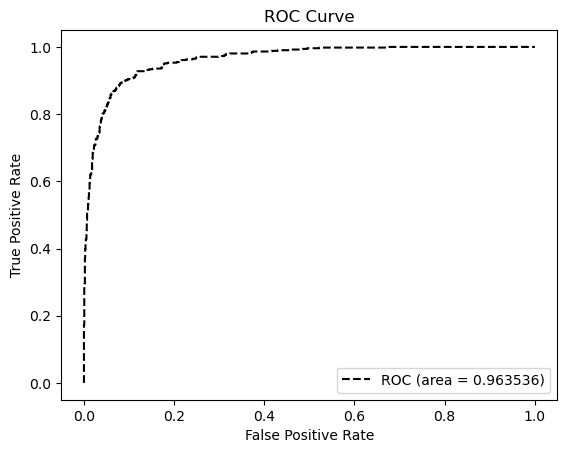

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thersholds = roc_curve(y_test, xgb_descri_test_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.6f})'.format(roc_auc) )
plt.xlim([-0.05, 1.05])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()